# **ROS Method for Censored Data Analysis**
### *Using Regression on Order Statistics (ROS) for Left-Censored Environmental Data*

This notebook demonstrates how to use the **ROS (Regression on Order Statistics) method** 
for handling left-censored environmental data, particularly when dealing with detection limits.

---

## **👤 Author Information**
- **Author:** Ali Valipoor
- **Email:** Aliiivalipoor@gmail.com
- **Date:** March 2025
- **Version:** 1.0

---

## **📌 Overview**
- This method is inspired by the **NADA R package**, commonly used for environmental statistics.
- The dataset contains **benzene concentration measurements**, where some values are censored (below the detection limit).
- We use the ROS method to estimate the censored values and analyze the distribution.

---

## **📚 References**
- Helsel, D. R. (2005). *Nondetects and Data Analysis: Statistics for Censored Environmental Data*.
- Helsel, D.R. (2012). *Statistics for Censored Environmental Data Using Minitab and R*.
- NADA R Package: [CRAN NADA](https://cran.r-project.org/web/packages/NADA/index.html)


## **1️⃣ Setting Up the Environment**
To ensure reproducibility, I provide an **environment.yml** file. If you haven’t set up the environment, run:

### **🔹 a) Install the Conda Environment (only once)**
Uncomment and run the following cell to create the Conda environment from `environment.yml`:


In [1]:
# !conda env create -f environment.yml

### **🔹 b) Activate the Environment in Jupyter**
Uncomment and run this command if using the Conda environment in Jupyter:

In [2]:
# !conda activate ros_env

## **2️⃣ Import Required Libraries**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from ros_implementation import ROS  # Import the ROS implementation

## **3️⃣ Load the Example Dataset (MPCA_benz.csv)**
The dataset contains:
- **`Benzene`** → Measured benzene concentration.
- **`BenzCen`** → Boolean indicator (`True` if censored, meaning below detection limit).

In [4]:
# Load dataset
df = pd.read_csv("MPCA_benz.csv")

# Display first few rows
df.head()

# Convert columns into numerical arrays for processing.
obs = df["Benzene"]
censored = df["BenzCen"].astype(bool)  # Ensure it is boolean



## **4️⃣ Apply ROS Method**
We apply the **Regression on Order Statistics (ROS)** method to estimate censored values.
- We assume a **log-normal distribution** for modeling.
- The model is fitted to the dataset, reconstructing censored values.


In [5]:
# Initialize ROS object (log-normal distribution is the default)
ros = ROS(distribution="log-normal")

# Fit the model
ros.fit(obs, censored)


## **5️⃣ Summarize & Visualize Results**
- The **summary()** function provides descriptive statistics of the modeled dataset.
- The **Q-Q plot** helps assess the normality of the transformed dataset.


In [11]:
# Print summary statistics
ros.summary();


ROS SUMMARY

MODEL INFORMATION
------------------------------------------------------------
Distribution       Log-normal
AIC                -10558.0145
BIC                -10545.2665
PPCC               0.9931
Shapiro-Francia W  0.9866

DATA INFORMATION
------------------------------------------------------------
Total observations       4333
Censored observations    222 (5.1%)
Uncensored observations  4111 (94.9%)

STATISTICAL SUMMARY
------------------------------------------------------------
 Mean                0.5878
 Median              0.492
 Standard Deviation  1.0749
1th Percentile       0.1449
5th Percentile       0.1981
10th Percentile      0.2524
25th Percentile      0.3514
50th Percentile      0.492
75th Percentile      0.6837
90th Percentile      0.9642
95th Percentile      1.1916
99th Percentile      1.8423



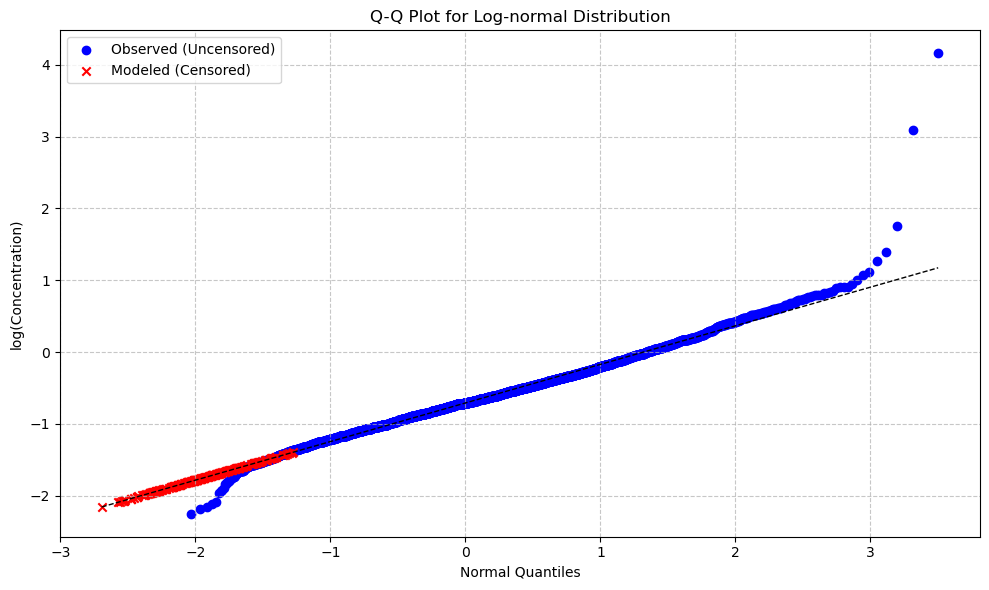

In [12]:
# Visualize the Q-Q plot
ros.plot_qq();

## **6️⃣ Export Results as a CSV File**
We convert the ROS-modeled dataset to a Pandas DataFrame for further analysis or external use.


In [13]:
# Convert results to a DataFrame
ros_results = ros.to_dataframe()

# Save results to CSV (optional)
ros_results.to_csv("ROS_results.csv", index=False)

# Display the first few rows of the modeled results
ros_results.head()


,obs,censored,pp,modeled
0,0.0767,True,0.00965,0.140071
1,0.0895,True,0.00965,0.140071
2,0.0926,True,0.00965,0.140071
3,0.0958,True,0.00965,0.140071
4,0.0990,True,0.00965,0.140071


## **✅ Conclusion**
This notebook demonstrated how to apply the **ROS method** for analyzing **censored benzene data**.

### **🔹 Key Takeaways**
- **Regression on Order Statistics (ROS)** helps estimate censored values when dealing with **detection limits**.
- The method is comparable to the **NADA R package**, making it useful for **environmental statistics**.
- The **Q-Q plot** visually confirms the assumption of a **log-normal** or **normal** distribution.

### **📌 Next Steps**
- Implement **Gamma and Weibull distributions**.
- Implement **confidence intervals for exceedance probabilities** (currently not included).

---
